# DFTTK Example for SQS

## Introduction

In [1]:
! dfttk -h

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

usage: dfttk [-h] {run,config,db_remove,thelec,thfind,EVfind} ...

Run DFTTK jobs.

positional arguments:
  {run,config,db_remove,thelec,thfind,EVfind}
    run                 Run dfttk.
    config              Config dfttk.
    db_remove           Remove data in MongoDb.
    thelec              Postprocess DFTTK results after DFT job completed.
    thfind              Check the dfttk DFT calculation results followed by
                        calling the 'thelec' module to get thermodynamic
                        properties when the option '-get' is given.
    EVfind              Find the metadata tags that have 0 K static calculaton
                        finished.

optional arguments:
  -h, --help            show this help message and exit


## Run DFTTK

### Input
* Structure file of Al3Ni SQS (POSCAR.Al3Ni)

```
Title: Sun Sep 13 22:17:31 EDT 2020 /storage/work/y/yuw3/SQS/fcc/25/SQS16
 3.55
    0.500000    0.500000   -1.000000
    0.000000   -1.500000   -0.500000
   -2.000000    0.500000   -0.500000
Al Ni
12 4
Direct
0.25000000 0.18750000 0.31250000
0.25000000 0.43750000 0.06250000
0.50000000 0.12500000 0.87500000
0.50000000 0.37500000 0.62500000
0.50000000 0.62500000 0.37500000
0.50000000 0.87500000 0.12500000
0.75000000 0.06250000 0.43750000
0.75000000 0.31250000 0.18750000
0.75000000 0.56250000 0.93750000
0.75000000 0.81250000 0.68750000
1.00000000 0.75000000 0.25000000
1.00000000 1.00000000 1.00000000
0.25000000 0.68750000 0.81250000
0.25000000 0.93750000 0.56250000
1.00000000 0.25000000 0.75000000
1.00000000 0.50000000 0.50000000  
```
* Setting file (SETTINGS.yaml)

```yaml
override_default_vasp_params : 
    user_incar_settings :
        magmom: [16*1]
        store_raw_vasprunxml : True
        Relax_settings:
            PREC: High
            grid_density: 1000

phonon : True
force_phonon : True
phonon_supercell_matrix : [[0,1,1], [1,0,1], [1,1,0]]
```
Prepare POSCAR and SETTINGS.yaml file and put them in the same directory. Then run following commands to start the workflow.


### DFTTK run module



Use `-wf` to specify the workflow to run, here we use `robust` workflow. Use `-f` to specify the strucutre file, here the name of the structure file is `POSCAR`. Use `-s` to specify the setting file, here the setting file is `SETTINGS.yaml`. Use -l to launch the workflow to launchpad. For more options, please refer to `dfttk run -h`



In [1]:
! dfttk run -wf robust -f POSCAR.Al3Ni -s SETTINGS -l

DFTTK version: 0.3.2+372.g27acc3f
Copyright © Phases Research Lab (https://www.phaseslab.com/)

2021-10-08 14:11:09,905 INFO Added a workflow. id_map: {-4: 6261, -3: 6262, -2: 6263, -1: 6264}


To launch the DFT batch job in the computers that VASP installed, you can use `qlaunch singleshot`

To manage workflow and check the status of your work, you can use `lpad` command. For more options, please refer to `lpad -h`

In [5]:
! lpad get_wflows -s RUNNING

[
    {
        "state": "RUNNING",
        "name": "Al:EV_QHA--6264",
        "created_on": "2021-10-08T18:11:09.780000",
        "states_list": "W-W-W-RUN"
    },
    {
        "state": "RUNNING",
        "name": "Zn6Ru:EV_QHA--6249",
        "created_on": "2021-10-05T17:42:36.799000",
        "states_list": "W-W-RUN"
    },
    {
        "state": "RUNNING",
        "name": "Zn22Ru:EV_QHA_Append--5734",
        "created_on": "2021-09-14T19:16:53.416000",
        "states_list": "W-C-C-C-W-RUN-C"
    },
    {
        "state": "RUNNING",
        "name": "Zn22Ru:EV_QHA_Append--5728",
        "created_on": "2021-09-14T12:39:49.698000",
        "states_list": "W-W-RUN-C-W-RUN-C"
    }
]


## Plot thermodynamic properties

Use `dfttk thfind` to check the completed task.

In [4]:
! dfttk thfind

DFTTK version: 0.3.2+372.g27acc3f
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': '428621f2-f44f-4c92-b307-04a89c77da5f'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE
{'tag': 'a715a62f-bfa7-4d95-bffb-41d56865c488'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE#0
{'tag': '6b23d6a5-d15c-46de-be2f-f021159e852d'}, phonon:  8, static:  8, SN:  52, qha_phonon: T, Zn8Pd5_I-43m_217PBE
{'tag': 'fa5e4e62-91b0-4c62-acff-26ae851da38b'}, phonon:  9, static:  9, SN:  33, qha_phonon: T, ZnPd10_P-1_2PBE
{'tag': '76dd7e4c-9c8e-4f8e-8083-b4aaa6218eb9'}, phonon:  8, static:  8, SN:  27, qha_phonon: F, ZnPd8_P-31m_162PBE
{'tag': '3c01629a-b287-41f5-8826-d77912f54177'}, phonon:  7, static:  8, SN:  64, qha_phonon: T, Al_Fm-3m_225PBE
{'tag': 'db521c56-bd17-4b15-9887-ff964f0c6f7c'}, phonon:  7, static:  7, SN:  90, qha_phonon: T, Al3Ru2_I4.mmm_139PBE
{'tag': '48623a91-47ac-4054-b46b-2e2

Check the tag for the workflow for Al. Then use `dfttk thfind` to plot all thermodynamic properties based on DFTTK results. For more options, please refer to ` dfttk thfind -h` 

In [9]:
! dfttk thfind -get -renew -py -w Al3Ni -plot DFTTK

DFTTK version: 0.3.2+372.g27acc3f
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': '3c01629a-b287-41f5-8826-d77912f54177'}, phonon:  7, static:  8, SN:  64, qha_phonon: T, Al_Fm-3m_225PBE

1/1 qha_phonon successful under the given searching conditions.


Postprocess for thermodynamic properties, Seebeck, Lorenz number etc.

Full Formula (Al1)
Reduced Formula: Al
abc   :   3.034716   3.034716   3.034716
angles:  60.000000  60.000000  60.000000
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Al      0    0    0


niggli reduced structure Full Formula (Al1)
Reduced Formula: Al
abc   :   3.034716   3.034716   3.034716
angles:  60.000000  60.000000  60.000000
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Al      0    0    0


found volumes from static calculations: [14.01001023 14.83413091 15.65825442 16.48236788 17.30648625 18.13061497
 18.95471961 19.76236909]

vasp version fo

The figures are in folder `Al3Ni_P-1_2PBE/figures`

Heat_capacities_300.png


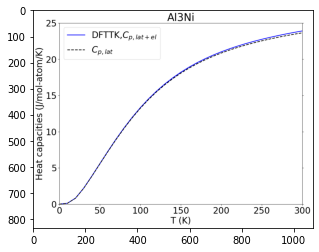

Bulk_modulus.png


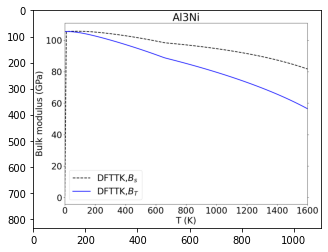

LTC.png


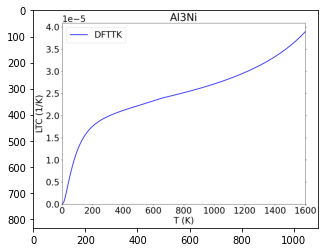

Effective_charge_carrier_concentration_100.png


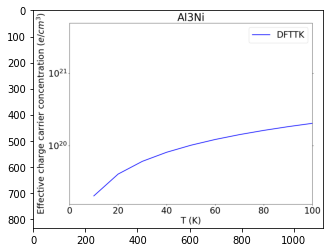

vdos298.15.png


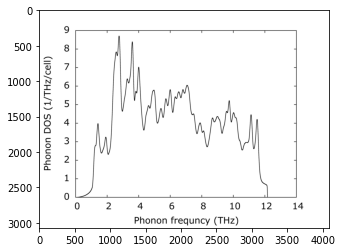

Helmholtz_energy.png


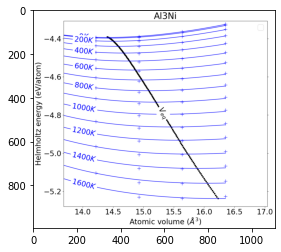

Heat_capacities_1000_oT2.png


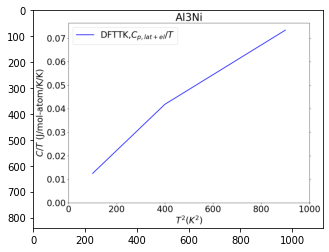

Lorenz_number.png


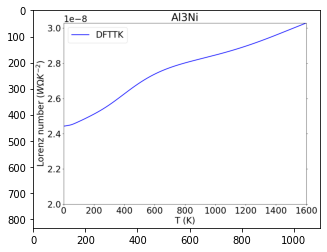

Helmholtz_energy_analysis.png


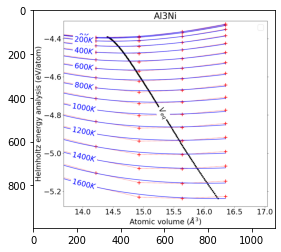

vdis298.15.png


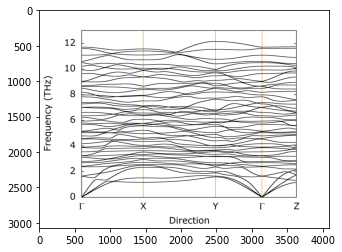

Gibbs_energy-H298.png


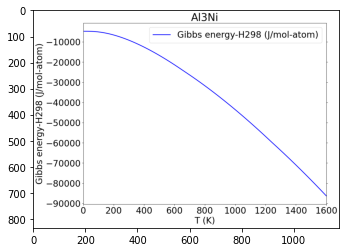

Debye_temperature.png


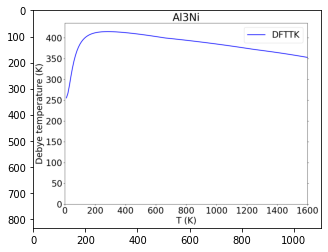

Heat_capacities_100_oT2.png


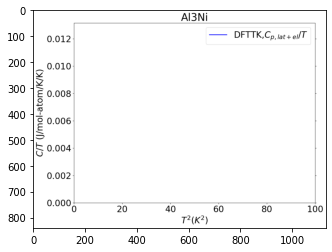

Seebeck_coefficients.png


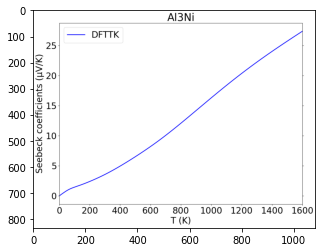

Effective_charge_carrier_concentration.png


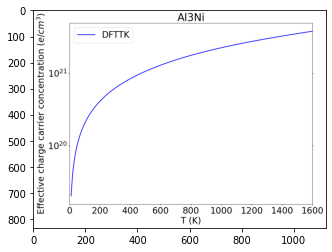

Absolute_thermal_electric_force.png


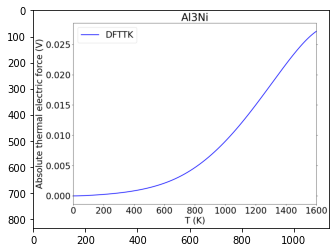

Gruneisen_coefficient.png


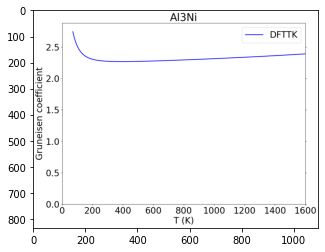

0_K_total_energies.png


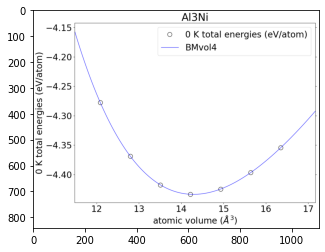

Debye_temperature_70.png


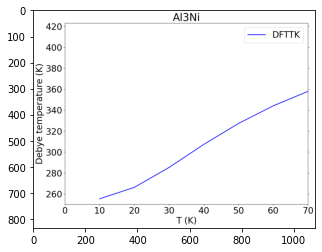

Enthalpy-H298.png


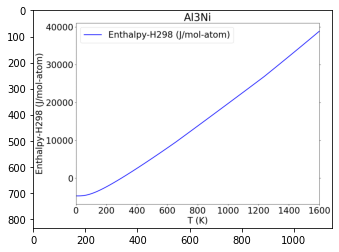

Heat_capacities_300_el_oT.png


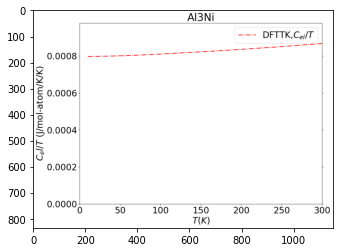

Atomic_volume.png


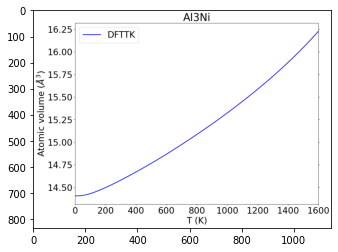

Entropy.png


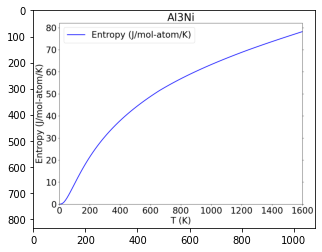

Heat_capacities.png


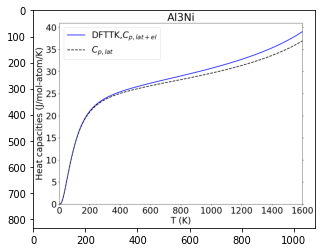

In [4]:
import os
import matplotlib.image as im
import matplotlib.pyplot as plt
%matplotlib inline
path_name='Al3Ni_P-1_2PBE/figures'
for item in os.listdir(path=path_name):
    if 'eps' not in item:
        print (item)
        img = im.imread(os.path.join(path_name,item))
        plt.imshow(img)
        plt.show()

You can also specify the figure that you would like to plot.

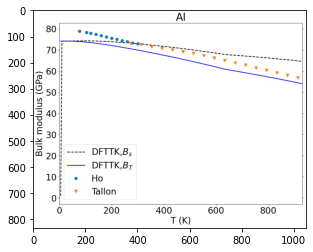

In [4]:
path_name='Al3Ni_P-1_2PBE/figures'
item='Bulk_modulus.png'
img = im.imread(os.path.join(path_name,item))
plt.imshow(img)
plt.show()

In addtion to figures, original data are generated by `thfind`